<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%5B%E8%A7%A3%E7%AD%94%5D%E6%BC%94%E7%BF%92%E8%AA%B2%E9%A1%8C_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E2%85%A2_0910.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習データクリーニング演習課題
【課題】と書いてあるセルでは、自分でプログラムを作成してください。

1. 実行ボタンを押してプログラムの動作確認を行い、Google Classroomから提出してください。
2. 提出する際は、コメント(#から始まる部分)を削除せずに残してください。
3. 〆切が近いので、後回しにせず講義時間中に手を動かしてプログラムを作成すること。

In [ ]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (7,756 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

## 1. 欠損データの扱い
欠損値を適切に処理することで、学習データの質を担保します。以下では確認、削除、補完、複数戦略比較まで実施します。

**ステップ1: サンプルデータ作成**

In [ ]:
"""
最初にpandasとnumpyを読み込み、欠損値を含むサンプルDataFrameを構築しています。
A列とB列には数値とnanを、C列には文字列とNoneを混在させ、基礎的なデータ欠損例を準備しました。
このサンプルを用いて、以降のセルで欠損値の可視化や補完手法を学ぶ土台を整えています。
"""

import pandas as pd
import numpy as np

# 欠損値を含むサンプル作成
df = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 5, 7.5, np.nan, 9],
    'C': ['X', 'Y', np.nan, 'Z', 'X']
})
df


,A,B,C
0,1.0,NaN,X
1,2.0,5.0,Y
2,NaN,7.5,NaN
3,4.0,NaN,Z
4,5.0,9.0,X


**ステップ2: 欠損値の可視化**
欠損パターンを理解するため、ヒートマップで可視化します。

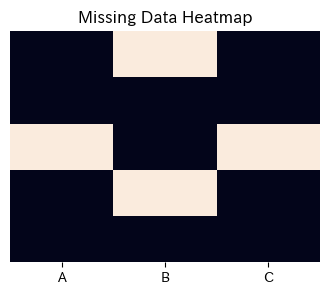

In [ ]:
"""
seabornとmatplotlibを活用して、DataFrameの欠損位置をヒートマップとして可視化します。
df.isnull()で欠損値をTrue/Falseで検知し、heatmapで行ごとのパターンを示します。
yticklabels=Falseやcbar=Falseにより視覚情報をシンプルにします。
出力されたグラフを通じて、データ構造における欠損の分布傾向を把握します。このような視覚化はデータサイズが大きくなった時、より有効になります。
"""

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

**【課題】ステップ3: 欠損値の削除と補完**

In [ ]:
"""
欠損を含む行を一括で削除し、行数の変化からデータ損失量を確認します。
続けてSimpleImputerを用い、A・B列は中央値、C列は最頻値で補完する手法を適用します。
"""

from sklearn.impute import SimpleImputer

# 欠損を含む行を削除
df_drop = df.dropna()
print('削除後のデータ 行数:', len(df_drop))
print('削除後のデータ:')
print(df_drop)

# 中央値・最頻値補完用のインスタンス
imp_num = SimpleImputer(strategy='median')
imp_cat = SimpleImputer(strategy='most_frequent')

# dfをコピーして補完用に使用
df_comp = df.copy()
df_comp[['A','B']] = imp_num.fit_transform(df[['A','B']])
df_comp[['C']] = imp_cat.fit_transform(df[['C']])

print('\n補完後のデータ:')
print(df_comp)

削除後のデータ 行数: 2
削除後のデータ:
     A    B  C
1  2.0  5.0  Y
4  5.0  9.0  X

補完後のデータ:
     A    B  C
0  1.0  7.5  X
1  2.0  5.0  Y
2  3.0  7.5  X
3  4.0  7.5  Z
4  5.0  9.0  X


**ステップ4: 補完戦略比較**
平均・中央値・定数補完の結果を比較します。

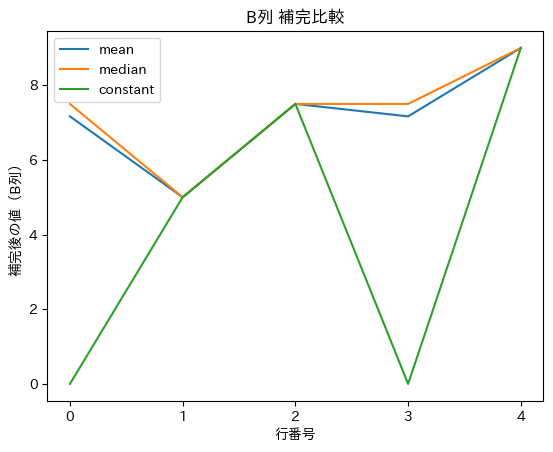

In [ ]:
"""
mean、median、constantの三戦略で欠損値補完を実行し、補完後の時系列データを比較しています。
SimpleImputerを戦略ごとにインスタンス化し、B列の欠損を補完後の値を辞書に格納しました。
matplotlibで各戦略の結果を折れ線で重ね描画し、補完の違いを明示しています。
補完手法間の挙動差を可視化し、最適な戦略選択に向けた洞察を得ます。
"""

# 欠損補完の戦略をリストで定義（平均、中央値、定数）
strategies = ['mean', 'median', 'constant']

# 各戦略ごとに補完後の結果を保存する辞書を用意
df_dict = {}

# 各戦略に対して補完処理を実行
for strat in strategies:
    # 定数補完の場合はfill_value（埋める値）を指定、それ以外は戦略だけ指定
    imp = SimpleImputer(strategy=strat, fill_value=0) if strat == 'constant' else SimpleImputer(strategy=strat)

    # 元のデータフレームをコピーして補完対象とする
    df_copy = df.copy()

    # B列の欠損を補完し、結果を新たな列B_impとして保存
    df_copy['B_imp'] = imp.fit_transform(df_copy[['B']])

    # 補完済みの列（シリーズ）を辞書に保存（キー：戦略名、値：補完結果の配列）
    df_dict[strat] = df_copy['B_imp']

# グラフ描画の準備
plt.figure()
# 各戦略の補完結果を折れ線グラフとしてプロット
for strat, series in df_dict.items():
    plt.plot(series.values, label=strat)  # 戦略ごとの補完結果を線として描画
# 凡例を表示（各戦略のラベル）
plt.legend()
# グラフタイトル
plt.title('B列 補完比較')
# 軸ラベルの設定
plt.xlabel('行番号')  # 横軸：データのインデックス（行番号）
plt.ylabel('補完後の値（B列）')  # 縦軸：補完されたB列の値
# x軸を整数のみ表示するように設定（小数を避ける）
plt.xticks(ticks=np.arange(len(df)), labels=np.arange(len(df)))
# グラフの表示
plt.show()

**【課題】ステップ5: データの正規化・標準化**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# df_comp A,B列を使用
df_numeric = df_comp[['A', 'B']].copy()

# Min-Maxスケーリング（正規化）
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=['A_minmax', 'B_minmax'])

# 標準化（Zスコア）
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=['A_zscore', 'B_zscore'])

# 元データと並べて表示
df_scaled = pd.concat([df_numeric, df_minmax, df_standard], axis=1)
print("正規化と標準化の比較")
display(df_scaled.head())


正規化と標準化の比較


,A,B,A_minmax,B_minmax,A_zscore,B_zscore
0,1.0,7.5,0.00,0.625,-1.414214,0.155230
1,2.0,5.0,0.25,0.000,-0.707107,-1.785146
2,3.0,7.5,0.50,0.625,0.000000,0.155230
3,4.0,7.5,0.75,0.625,0.707107,0.155230
4,5.0,9.0,1.00,1.000,1.414214,1.319456


## 2. カテゴリデータの処理
カテゴリカルデータの数値化手法を比較し、最適な方法を選択します。

**ステップ1: データ準備**

In [ ]:
"""
カテゴリ変数の例としてcolor、size、labelを持つDataFrameをpandasで生成します。
赤・青・緑などのカテゴリ情報を含め、後続のエンコーディング手法を試すためのサンプルを用意します。
"""
from sklearn.preprocessing import LabelEncoder

df_cat = pd.DataFrame({
    'color': ['赤','青','緑','青','赤'],
    'size': ['低','中','高','中','低'],
    'label': ['良','良','悪','良','悪']
})
df_cat

,color,size,label
0,赤,低,良
1,青,中,良
2,緑,高,悪
3,青,中,良
4,赤,低,悪


**【課題】ステップ2: 順序特徴量マッピング**

In [ ]:
# size列に対し、手動マッピングとOrdinalEncoderによる自動マッピングを両方実施しています。
from sklearn.preprocessing import OrdinalEncoder

# 【手動マッピング】
# 'size'列のカテゴリ値（低・中・高）に対して、辞書を用いて数値を割り当てる
# 低 → 0、中 → 1、高 → 2 と明示的に変換
df_cat['size_map'] = df_cat['size'].map({'低': 0, '中': 1, '高': 2})

# 【OrdinalEncoderによる自動マッピング】
# sklearnのOrdinalEncoderを使って、同様の順序付きカテゴリ変換を行う
# categoriesパラメータで、変換順序を ['低', '中', '高'] と明示的に指定
enc = OrdinalEncoder(categories=[['低', '中', '高']])
df_cat['size_ord'] = enc.fit_transform(df_cat[['size']])

# 【確認表示】
# 元の'size'列、手動変換列'size_map'、自動変換列'size_ord'を並べて表示
# → 変換結果が一致しているかを確認する（両者が同一であれば正しく順序変換されている）
df_cat[['size', 'size_map', 'size_ord']]

,size,size_map,size_ord
0,低,0,0.0
1,中,1,1.0
2,高,2,2.0
3,中,1,1.0
4,低,0,0.0


**【課題】ステップ3: ワンホットエンコーディング**

In [ ]:
"""
pandasのget_dummies()を使って、'color'列をOne-Hotエンコーディングする
→ カテゴリごとに0または1の列を作り、機械学習モデルが扱いやすい数値形式に変換する
"""

# drop_first=False により、すべてのカテゴリ列を保持
df_ohe = pd.get_dummies(df_cat, columns=['color'], drop_first=False, dtype=int)

# One-Hot化されたデータを表示（color_緑, color_赤, ... のような列が追加される）
df_ohe

,size,label,size_map,size_ord,color_緑,color_赤,color_青
0,低,良,0,0.0,0,1,0
1,中,良,1,1.0,0,0,1
2,高,悪,2,2.0,1,0,0
3,中,良,1,1.0,0,0,1
4,低,悪,0,0.0,0,1,0


**【課題】ステップ4: ラベルエンコーディング**

In [ ]:
"""
'label'列は「良」「悪」の2値（バイナリ）カテゴリであり、
LabelEncoderで0と1に変換しても、値の大小に意味が生まれないため、
問題なくラベルエンコーディングを使用可能です。
"""

# LabelEncoderを使って、'label'列の文字データを0や1などの数値に変換
le = LabelEncoder()
df_ohe['label_enc'] = le.fit_transform(df_ohe['label'])

# 変換結果を表示（label列が数値化されたlabel_enc列を追加）
df_ohe

,size,label,size_map,size_ord,color_緑,color_赤,color_青,label_enc
0,低,良,0,0.0,0,1,0,1
1,中,良,1,1.0,0,0,1,1
2,高,悪,2,2.0,1,0,0,0
3,中,良,1,1.0,0,0,1,1
4,低,悪,0,0.0,0,1,0,0


## 3. 外れ値検出と処理
複数手法を比較し、効果と適用場面を学びます。

**ステップ1: データ準備と箱ひげ図**

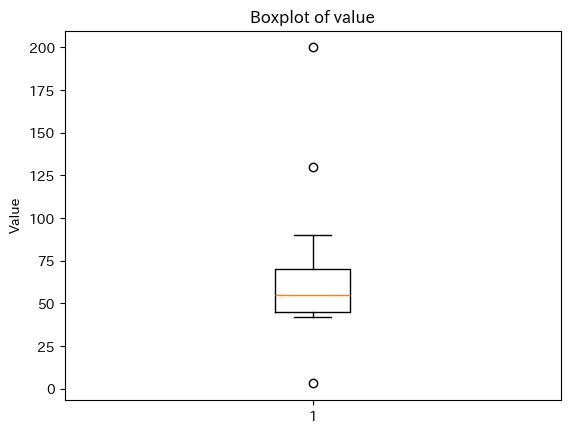

In [ ]:
"""
数値データの分布や外れ値を視覚的に確認するために箱ひげ図（boxplot）を作成します。
まず、ばらつきのある数値のリストをpandasのDataFrameに変換し、matplotlibを使って箱ひげ図を描画します。
箱ひげ図は、中央値・四分位範囲・外れ値などを一目で把握できる
基本的な統計可視化の手法です。
"""

# 数値データ（外れ値も含む）
data = [
    42, 45, 43, 58, 3, 53, 51, 70, 42, 44, 46, 87, 50,
    55, 60, 65, 70, 80, 90, 130, 200
]

# DataFrameに変換
df = pd.DataFrame({'value': data})

# 箱ひげ図を作成
plt.boxplot(df['value'])

# タイトルとラベルを追加
plt.title('Boxplot of value')           # グラフタイトル
plt.ylabel('Value')                     # y軸ラベル（数値のスケール）
plt.show()


**【課題】ステップ2: IQR除去**

In [ ]:
"""
四分位範囲（IQR）を使ってデータの中から外れ値を見つけて取り除く方法を示します。
IQRとは「データの真ん中50%の広がり」を表す指標で、第1四分位点（Q1）と第3四分位点（Q3）を用いて計算されます。
この範囲から大きく外れた値（通常 Q1 − 1.5×IQR より小さいか、Q3 + 1.5×IQR より大きい値）は、
異常なデータ（外れ値）とみなして取り除きます。

"""

# データ例（value列）からQ1（第1四分位）とQ3（第3四分位）を計算
Q1, Q3 = df['value'].quantile([0.25, 0.75])

# IQR（四分位範囲）を計算：真ん中50%の広がり
IQR = Q3 - Q1

# Q1 - 1.5×IQR 未満、または Q3 + 1.5×IQR を超える値を外れ値と定義
# その範囲内にあるデータだけを取り出す
df_iqr = df[(df['value'] >= Q1 - 1.5 * IQR) & (df['value'] <= Q3 + 1.5 * IQR)]



# データ件数の変化を表示して、どれくらい外れ値が除去されたか確認する
print(f'元のデータ数: {len(df)}')
print(f'外れ値除去後のデータ数: {len(df_iqr)}')
print(f'除去されたデータ数: {len(df) - len(df_iqr)}')

# 外れ値を除いたデータを表示
df_iqr

元のデータ数: 21
外れ値除去後のデータ数: 18
除去されたデータ数: 3


,value
0,42
1,45
2,43
3,58
5,53
6,51
7,70
8,42
9,44
10,46


**【課題】ステップ3: Zスコア除去**

In [ ]:
"""
ここでは、前のステップで使った「IQRによる外れ値検出」とは別の方法として、
Zスコアを使った統計的な外れ値の検出を行います。

Zスコアとは、各データが平均からどれだけ離れているかを「標準偏差の単位」で表したものです。
一般的に、Zスコアの絶対値が2〜3を超えるデータは「平均から大きく離れた値＝外れ値」と考えられます。

ここではZスコアの絶対値が2以下のデータだけを残し、それより大きな値（外れ値）は除去します。
"""
from scipy import stats

# 各データのZスコアを計算（平均からの距離を標準偏差で割ったもの）
# np.absで絶対値を取り、正負どちらの方向の外れ値も検出できるようにする
df['z'] = np.abs(stats.zscore(df['value']))

# Zスコアが2以下のデータだけを抽出（平均から2標準偏差以内にあるデータを「正常」とみなす）
df_z = df[df['z'] <= 2]

# 結果の確認：残ったデータと除外された外れ値の数を出力
print(f'元のデータ数: {len(df)}')
print(f'Zスコアによる外れ値を除いたデータ数: {len(df_z)}')
print(f'除去された外れ値の数: {len(df) - len(df_z)}')

# 外れ値除去後のデータを表示
df_z


元のデータ数: 21
Zスコアによる外れ値を除いたデータ数: 20
除去された外れ値の数: 1


,value,z
0,42,0.620738
1,45,0.542836
2,43,0.594771
3,58,0.205264
4,3,1.633455
5,53,0.335099
6,51,0.387034
7,70,0.106342
8,42,0.620738
9,44,0.568804


## 4. 重複データの検出と削除
部分的キーや全列キーで挙動を比較します。

**ステップ1: サンプルデータ**

In [ ]:
"""
idとvalue列を持つDataFrameを作成し、重複行を含む例を準備します。
"""
df = pd.DataFrame({'id':[1,2,2,3,3,4,4],'value':['A','B','B','C','D','D','D']})
df

,id,value
0,1,A
1,2,B
2,2,B
3,3,C
4,3,D
5,4,D
6,4,D


**【課題】ステップ2: 全列 vs subset重複検出**

In [ ]:
"""
このコードでは、データの中に重複している行があるかどうかを2つの方法で調べます。

1. 全ての列の値が完全に一致している行（完全な重複）
2. 特定の列（ここでは 'id' 列）だけを基準に見た重複（idが重複）

両方の結果を並べて確認することで、どのような重複があるか、
またどのように重複処理すべきかを判断しやすくなります。
"""

# 【1】重複している行を抽出
dup_all = df[df.duplicated()]

# 【2】'id'列だけを基準に重複している行を抽出（他の列が違っていてもidが同じなら重複）
dup_id = df[df.duplicated(subset=['id'])]

# 結果の確認
print("▼ 全列が一致している重複行（完全一致）:")
print(dup_all)

print("\n▼ id列だけが重複している行（部分一致）:")
print(dup_id)


▼ 全列が一致している重複行（完全一致）:
   id value
2   2     B
6   4     D

▼ id列だけが重複している行（部分一致）:
   id value
2   2     B
4   3     D
6   4     D


**【課題】ステップ3: drop_duplicates挙動確認**

In [ ]:
"""
ここでは、重複した行を削除する方法を紹介します。

pandasの drop_duplicates() を使って、
1. 全ての列が同じ行（完全一致の重複）
2. 'id'列だけが同じ行（部分的な重複）

をそれぞれ削除し、結果を全て表示して比較します。
最初に出てきた行を残し、それ以降の重複を取り除くのが基本の動作です。
"""

# 【1】全ての列が一致する重複を削除
df_all_unique = df.drop_duplicates()
print("▼ 全列が一致する重複を削除したデータ:")
print(df_all_unique)

# 【2】'id'列のみを基準に重複を削除
df_id_unique = df.drop_duplicates(subset=['id'])
print("\n▼ 'id'列の重複を削除したデータ:")
print(df_id_unique)


▼ 全列が一致する重複を削除したデータ:
   id value
0   1     A
1   2     B
3   3     C
4   3     D
5   4     D

▼ 'id'列の重複を削除したデータ:
   id value
0   1     A
1   2     B
3   3     C
5   4     D


## 5. データ型とフォーマットの標準化
各文字列・日付整形手法と、特徴量抽出を学びます。

**ステップ1: データ読み込み**

In [ ]:
"""
名前と誕生日を含むサンプルデータをDataFrameとして定義します。

- name列には、空白や大小文字のバラつきがある文字列が含まれています。
- birthday列には、書式がバラバラな誕生日データが含まれています。

このような「整っていない生データ」をきれいに整えるのもデータクリーニングの目的です。
"""

# 不揃いな名前と日付を含むサンプルデータを作成
df = pd.DataFrame({
    'name': [' Alice Smith ', 'bob Johnson', 'CAROL Williams '],
    'birthday': ['1995/04/01', '01-06-1988', 'March 15 1992']
})

# 現時点でのデータの状態を確認
df


,name,birthday
0,Alice Smith,1995/04/01
1,bob Johnson,01-06-1988
2,CAROL Williams,March 15 1992


**【課題】ステップ2: 名前のクリーニングと分割**

In [ ]:
"""
ここでは、name列に対して以下の処理を行います：

1. str.strip()：文字列の前後にある空白を削除
2. str.title()：最初の文字を大文字、それ以外を小文字に変換（例: 'bob' → 'Bob')
3. str.split()：空白を区切りとして first_name（名前）と last_name（名字）に分ける

クリーンで扱いやすい名前情報を作るための基本的な処理です。
"""

# 前後の空白を取り、表記を整える
df['name_clean'] = df['name'].str.strip().str.title()

# 空白で名前を分割（'Alice Smith' → 'Alice', 'Smith'）
df[['first_name', 'last_name']] = df['name_clean'].str.split(' ', n=1, expand=True)

# 中間列（name_clean）は不要なので削除
df = df.drop(columns='name_clean')

# 結果を確認
df

,name,birthday,first_name,last_name
0,Alice Smith,1995/04/01,Alice,Smith
1,bob Johnson,01-06-1988,Bob,Johnson
2,CAROL Williams,March 15 1992,Carol,Williams


**【課題】ステップ3: 誕生日の形式統一と日付情報の抽出**

In [ ]:
"""
ここでは、誕生日の文字列を datetime 型に変換し、
年（birth_year）、月（birth_month）、曜日（birth_weekday）を抽出します。

複数のフォーマットが混ざっているため、format='mixed' を使って
各値に対して個別に形式を自動判別させます（pandas 2.2以降対応）。
"""

# 文字列を datetime 型に変換（自動で形式を個別推測）
df['birthday_parsed'] = pd.to_datetime(df['birthday'], format='mixed')

# 年、月、曜日を抽出
df['birth_year'] = df['birthday_parsed'].dt.year
df['birth_month'] = df['birthday_parsed'].dt.month
df['birth_weekday'] = df['birthday_parsed'].dt.weekday

# 結果表示
df

,name,birthday,first_name,last_name,birthday_parsed,birth_year,birth_month,birth_weekday
0,Alice Smith,1995/04/01,Alice,Smith,1995-04-01,1995,4,5
1,bob Johnson,01-06-1988,Bob,Johnson,1988-01-06,1988,1,2
2,CAROL Williams,March 15 1992,Carol,Williams,1992-03-15,1992,3,6
